In [ ]:
glue_tasks = ['cola', 'mnli', 'mrpc', 'qnli', 'qqp', 'rte', 'sst2', 'stsb', 'wnli']
batch_sizes = [8, 16, 32, 64, 128]
learning_rates = [3e-4, 1e-4, 5e-5, 3e-5]

task = 'mrpc'

# for task in glue_tasks[2:]:
! python run_glue.py \
    --model_name_or_path bert-base-uncased \
    --task_name {task} \
    --do_train \
    --do_eval \
    --per_device_train_batch_size 32 \
    --learning_rate 1e-4 \
    --num_train_epochs 4 \
    --output_dir ./results/run1/{task}/ \
    --report_to none

/home/tomyt/anaconda3/envs/mase/lib/python3.11/site-packages/torch/cuda/__init__.py:235: UserWarning: 
NVIDIA GeForce RTX 5080 with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_37 sm_90 compute_37.
If you want to use the NVIDIA GeForce RTX 5080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(
03/12/2025 23:07:55 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
03/12/2025 23:07:55 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_

In [ ]:
from datetime import datetime

current_time = datetime.now().strftime('%Y%m%d_%H%M%S')

glue_tasks = ['cola', 'mnli', 'mrpc', 'qnli', 'qqp', 'rte', 'sst2', 'stsb', 'wnli']
batch_sizes = [8, 16, 32, 64, 128]
learning_rates = [3e-4, 1e-4, 5e-5, 3e-5]

task = 'mrpc'

! python run_glue.py \
    --model_name_or_path ./batch_test_kd_last/40 \
    --task_name {task} \
    --do_train \
    --do_eval \
    --per_device_train_batch_size 32 \
    --learning_rate 1e-4 \
    --num_train_epochs 4 \
    --output_dir ./results/batch_test_kd_last/40 \
    --report_to none 


/home/tomyt/anaconda3/envs/mase/lib/python3.11/site-packages/torch/cuda/__init__.py:235: UserWarning: 
NVIDIA GeForce RTX 5080 with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_37 sm_90 compute_37.
If you want to use the NVIDIA GeForce RTX 5080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(
03/15/2025 19:20:31 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
03/15/2025 19:20:31 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_

In [ ]:
from datetime import datetime
import os
import json

current_time = datetime.now().strftime('%Y%m%d_%H%M%S')

glue_tasks = ['cola', 'mnli', 'mrpc', 'qnli', 'qqp', 'rte', 'sst2', 'stsb', 'wnli']
batch_sizes = [8, 16, 32, 64, 128]
learning_rates = [3e-4, 1e-4, 5e-5, 3e-5]

task = 'mrpc'

test_name = 'batch_test_kd_new'

step = 5  # Run every 5 epochs
epochs = range(0, 16, step)
for epoch in epochs:
    output_dir = f'./{test_name}/{epoch}'
    result_dir = f'./results/{test_name}/{epoch}/{task}'
    
    if not os.path.exists(result_dir):
        print(f"Running for epoch {epoch}")
        ! python run_glue.py \
            --model_name_or_path {output_dir} \
            --task_name {task} \
            --do_train \
            --do_eval \
            --per_device_train_batch_size 32 \
            --learning_rate 1e-4 \
            --num_train_epochs 4 \
            --output_dir {result_dir} \
            --report_to none
    else:
        print(f"Results for epoch {epoch} already exist, skipping...")


Running for epoch 0
/home/tomyt/anaconda3/envs/mase/lib/python3.11/site-packages/torch/cuda/__init__.py:235: UserWarning: 
NVIDIA GeForce RTX 5080 with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_37 sm_90 compute_37.
If you want to use the NVIDIA GeForce RTX 5080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(
03/17/2025 10:13:40 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
03/17/2025 10:13:40 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
ada

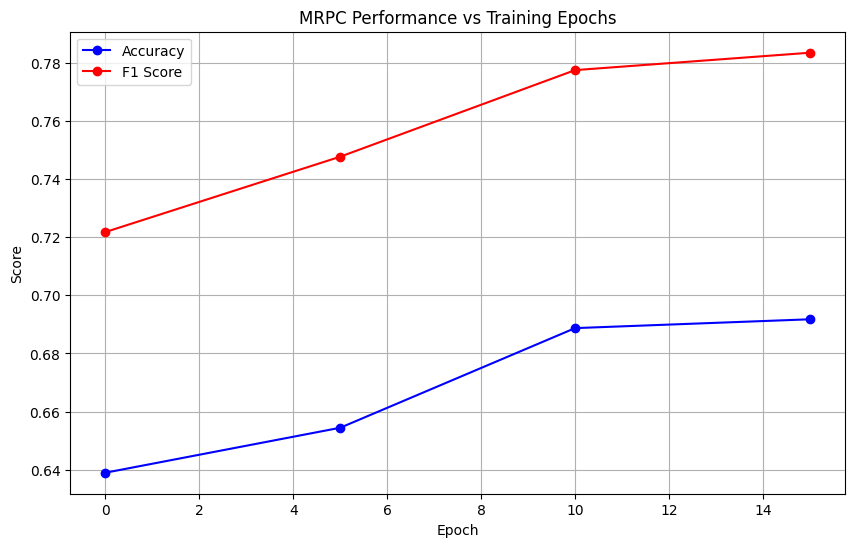

In [22]:
import matplotlib.pyplot as plt

accuracies = []
f1_scores = []
epochs = epochs
test_name = test_name

for epoch in epochs:
    result_file = f'./results/{test_name}/{epoch}/{task}/eval_results.json'
    if os.path.exists(result_file):
        with open(result_file, 'r') as f:
            results = json.load(f)
            accuracies.append(results['eval_accuracy'])
            f1_scores.append(results['eval_f1'])

plt.figure(figsize=(10, 6))
plt.plot(epochs[:len(accuracies)], accuracies, 'b-o', label='Accuracy')
plt.plot(epochs[:len(f1_scores)], f1_scores, 'r-o', label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('MRPC Performance vs Training Epochs')
plt.grid(True)
plt.legend()
plt.show()